<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99102531
            <br />
            Name = AmirMohammad    
            <br />
            Last_Name = Yousefi
        </div>
        <div class="column">
        <br />
            student_number = Stu. No. 2
            <br />
            Name = Mohsen
            <br />
            Last_Name = Nasiri
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

# Load Dataset and Prepare It

In [3]:
trainSet = MNIST(root='.', train=True, download=True, transform=transforms.ToTensor())
testSet = MNIST(root='.', train=False, download=True, transform=transforms.ToTensor())

image_shape = trainSet[0][0].shape
input_dim = np.prod(image_shape).item()
batch_size = 64

trainLoader = DataLoader(trainSet, batch_size, shuffle=False)
testLoader = DataLoader(testSet, batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 80260906.21it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 42369952.37it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21747265.50it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 18282657.17it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [20]:
# Add Noise
def noisyImage(image, mean=0, var=0.005):
    batch,ch,row,col = image.shape
    sigma = var**0.5
    noise = np.random.normal(mean,sigma,(batch,ch,row,col)).reshape(batch,ch,row,col)
    noisyImages = image + noise
    return normalize(noisyImages, batch, ch)

def normalize(image, batch, ch):
    for i in range(batch):
        image[i, :, :, :] *= (1/np.max(image[i, :, :, :].numpy()))
    return image

In [5]:
noisyTrain = []
for data in trainLoader:
    image, label = data[0], data[1]
    noisyTrain.append(noisyImage(image))

# Define Your Model
torch neural network model

In [11]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 32)
        self.layer5 = nn.Linear(32, 10)
        self.layer6 = nn.Linear(10, 32)
        self.layer7 = nn.Linear(32, 64)
        self.layer8 = nn.Linear(64, 128)
        self.layer9 = nn.Linear(128, 256)
        self.layer10 = nn.Linear(256, input_dim)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = self.layer5(x)
        x = F.relu(self.layer6(x))
        x = F.relu(self.layer7(x))
        x = F.relu(self.layer8(x))
        x = F.relu(self.layer9(x))
        x = F.sigmoid(self.layer10(x))
        return x

model = AutoEncoder()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Fit The Model
Also Define optimizer, Criterion and other parameters

In [13]:

optimizer = torch.optim.Adam(model.parameters(), 0.01)

for epoch in range(20):

    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        original_img, _ = data
        noisy_img = noisyTrain[i]

        original_img_copy = original_img.clone().detach().requires_grad_(True).to(device).reshape(-1, 28*28)

        noisy_img_copy = noisy_img.clone().detach().requires_grad_(True).to(device).reshape(-1, 28*28).to(torch.float32)

        output = model.forward(noisy_img_copy)
        loss = nn.MSELoss()(output, original_img_copy)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()
    print(f'Epoch [{epoch+1}] Loss= {loss.item():.6f}')


Epoch [1] Loss= 0.043602
Epoch [2] Loss= 0.038708
Epoch [3] Loss= 0.035789
Epoch [4] Loss= 0.034747
Epoch [5] Loss= 0.038597
Epoch [6] Loss= 0.034895
Epoch [7] Loss= 0.033655
Epoch [8] Loss= 0.035541
Epoch [9] Loss= 0.033571
Epoch [10] Loss= 0.033288
Epoch [11] Loss= 0.033226
Epoch [12] Loss= 0.032775
Epoch [13] Loss= 0.032940
Epoch [14] Loss= 0.034458
Epoch [15] Loss= 0.033877
Epoch [16] Loss= 0.033644
Epoch [17] Loss= 0.031926
Epoch [18] Loss= 0.031079
Epoch [19] Loss= 0.033422
Epoch [20] Loss= 0.032685


# Plot The Results

<ipython-input-21-bc000da11237>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


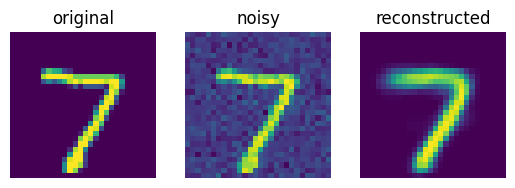

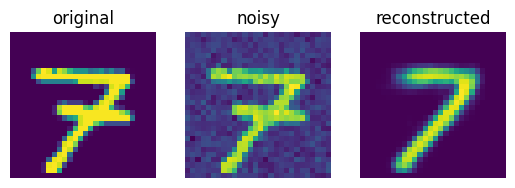

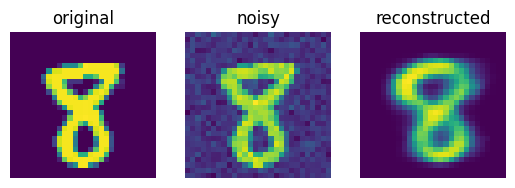

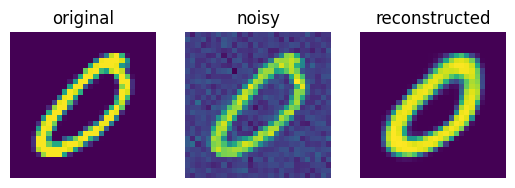

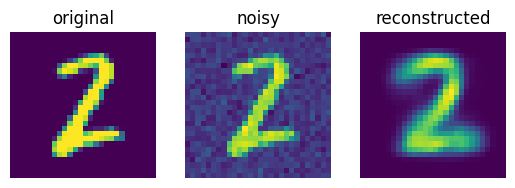

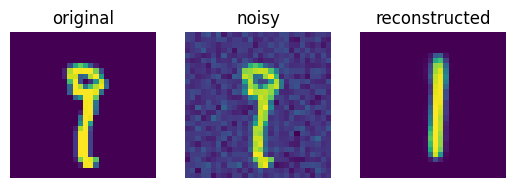

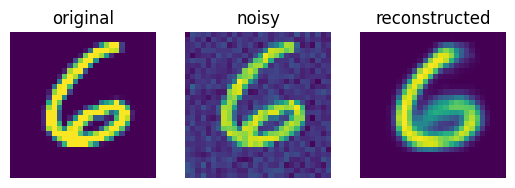

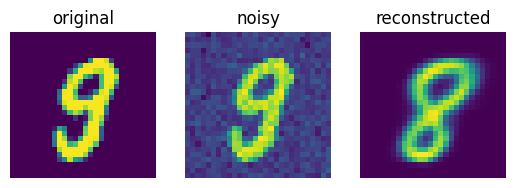

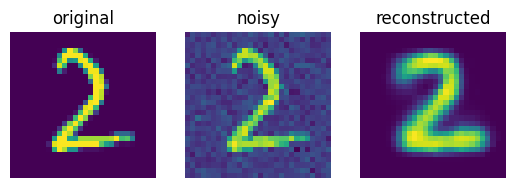

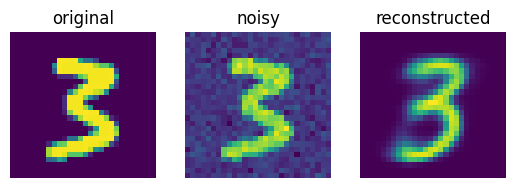

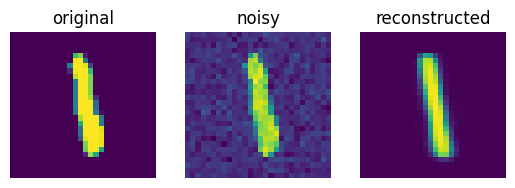

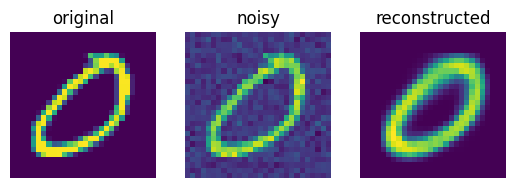

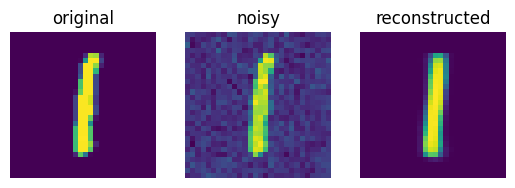

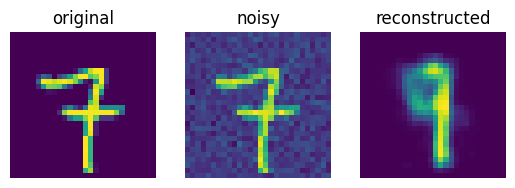

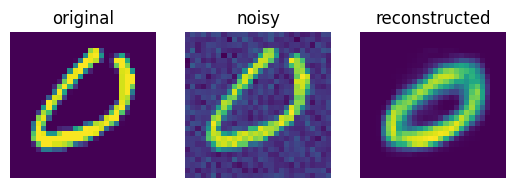

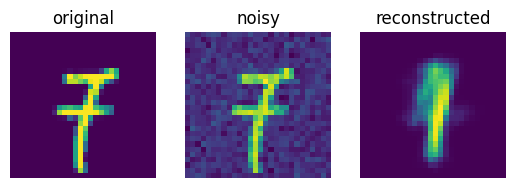

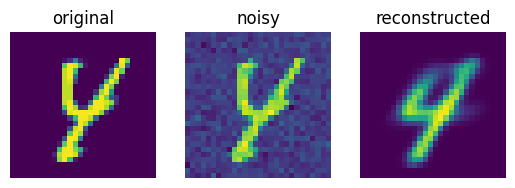

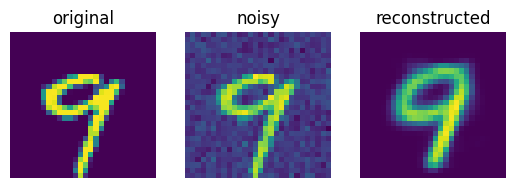

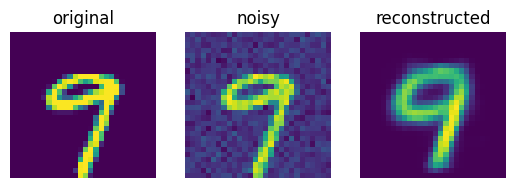

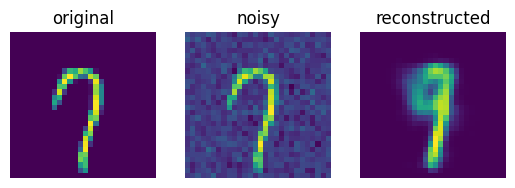

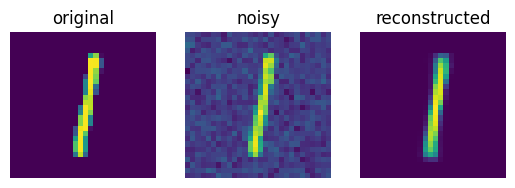

In [21]:
noisyTest = []

for data in testLoader:
    image, label = data[0], data[1]
    noisyTest.append(noisyImage(image))

for i, data in enumerate(testLoader, 0):
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(data[0][0][0])
    plt.title('original')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(noisyTest[i][0][0])
    plt.title('noisy')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    with torch.no_grad():
        rec = model.forward(noisyTest[i][0][0].to(device).reshape(-1, 28*28).to(torch.float32))
        plt.imshow(rec.cpu().reshape(28, 28))
    plt.title('reconstructed')
    plt.axis('off')
    if i >= 20:
        break

# PCA

<ipython-input-22-857b8ec812ba>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


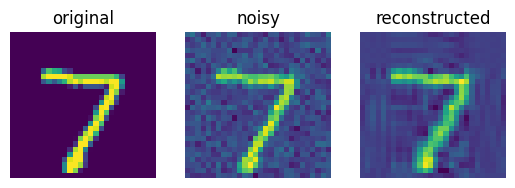

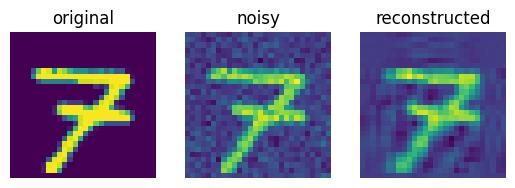

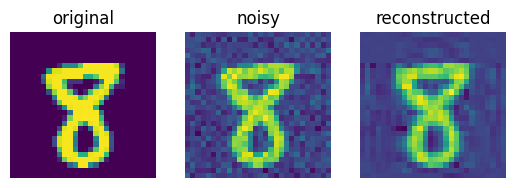

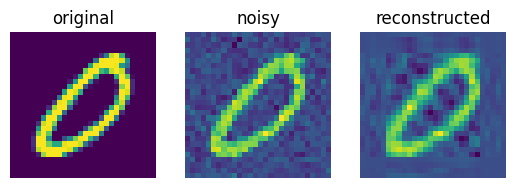

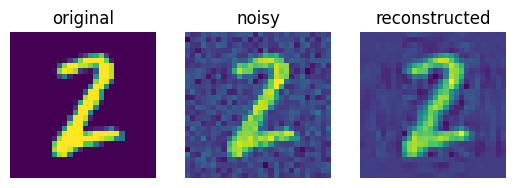

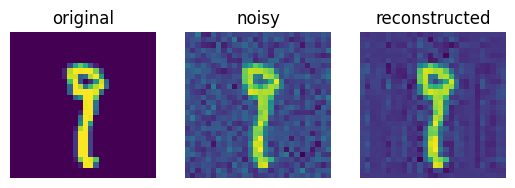

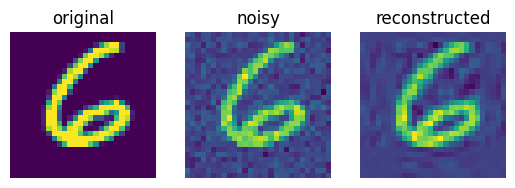

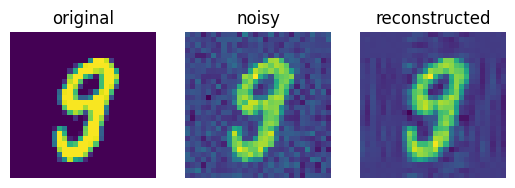

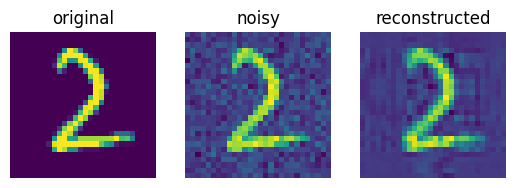

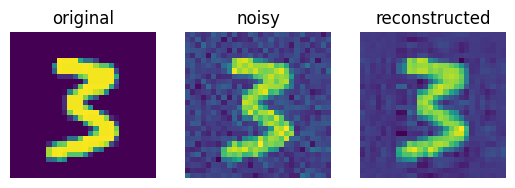

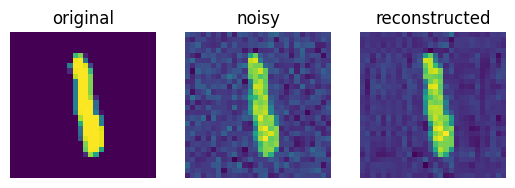

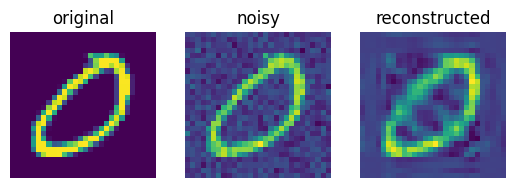

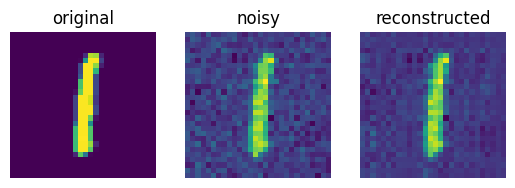

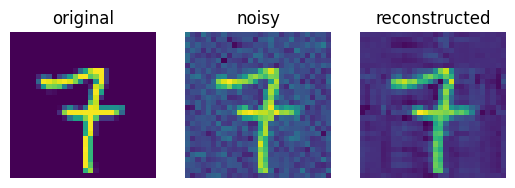

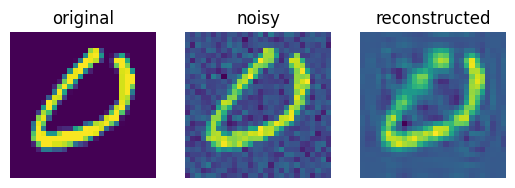

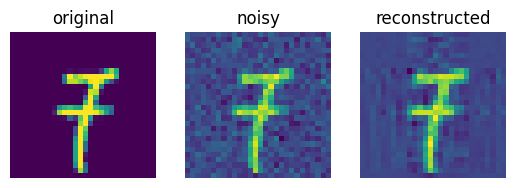

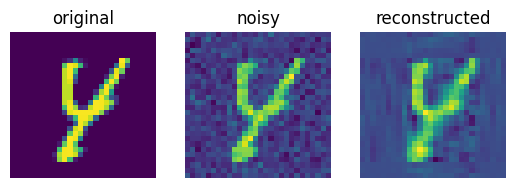

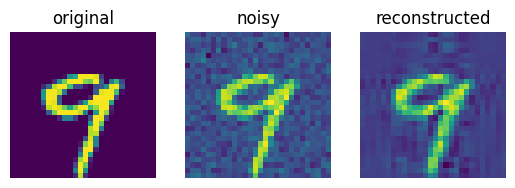

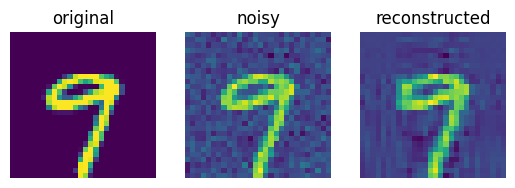

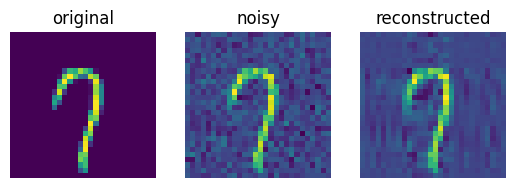

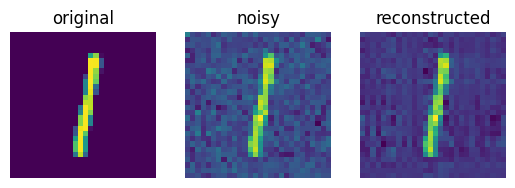

In [22]:
# Add Noise
def noisyImage2(image, mean=0, var=0.01):
    row,col = image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col)).reshape(row,col)
    noisy = image + gauss
    return normalize2(noisy)

def normalize2(image):
    image *= (1/np.max(image))
    return image
for i, data in enumerate(testLoader, 0):

    img,_ = data
    img = img[0][0].numpy()
    noisyImage = noisyImage2(img)
    U, Sigma, VT = np.linalg.svd(noisyImage)
    U_low, Sigma_low, VT_low = U[:, 0:5], Sigma[0:5] , VT[0:5, :]
    img_rec = U_low@np.diag(Sigma_low)@VT_low
    plt.figure()
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title('original')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(noisyImage)
    plt.title('noisy')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(img_rec)
    plt.title('reconstructed')
    plt.axis('off')
    if i>=20:
      break